In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [ ]:
import pandas as pd
import numpy as np

link = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(link, header="infer", delimiter=";")
print("\n========= Dataset summary ========= \n")
df.info()
print("\n========= A few first samples ========= \n")
print(df.head())


========= Dataset summary ========= 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB

========= A few first samples ========= 

   fixed acidity  volatile acidity  citric a

In [ ]:
X = df.drop("quality", axis=1) # we drop the column "quality"
Y = df["quality"]
print("\n========= Wine Qualities ========= \n")
print(Y.value_counts())


========= Wine Qualities ========= 

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


In [ ]:
Y = [0 if val <=5 else 1 for val in Y]

/tmp/ipython-input-2375315776.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


<Axes: >

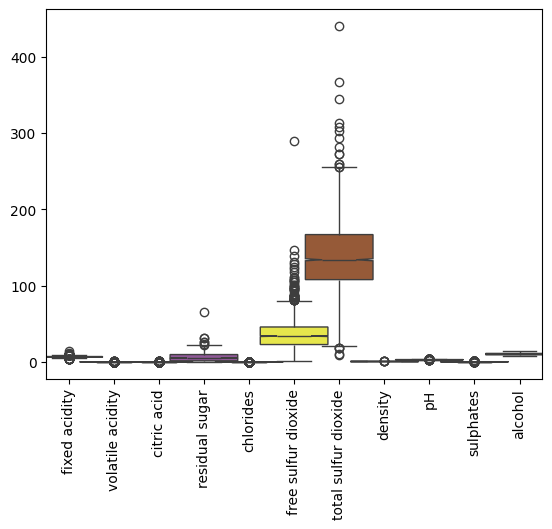

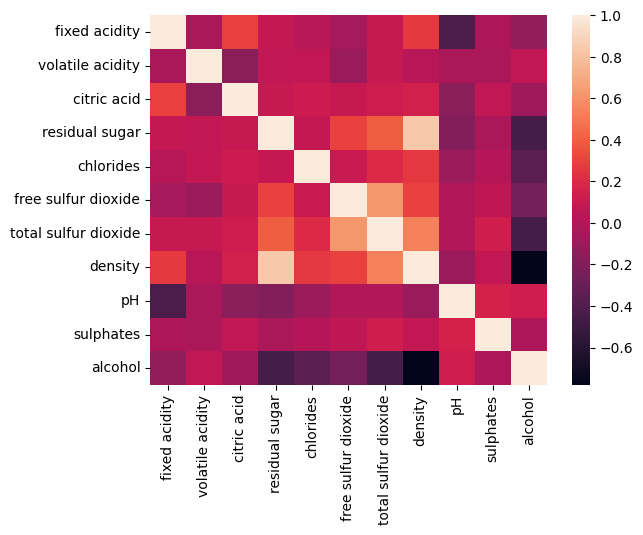

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
ax = plt.gca()
sns.boxplot(data=X,orient="v",palette="Set1",width=1.5, notch=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure()
corr = X.corr()
sns.heatmap(corr)

In [ ]:
from sklearn.model_selection import train_test_split

Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size=1/3, stratify=Y)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.5, stratify=Ya)

In [ ]:
from sklearn.model_selection import train_test_split
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size=1/3,
stratify=Y)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.5,
stratify=Ya)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Fit the model on (Xa, Ya)
k = 3
clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(Xa, Ya)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Predict the labels of samples in Xv
Ypred_v = clf.predict(Xv)
# evaluate classification error rate
from sklearn.metrics import accuracy_score
error_v = 1-accuracy_score(Yv, Ypred_v)

In [ ]:
# K values
k_vector = np.arange(1, 40)
error_train = np.zeros(len(k_vector))
error_val = np.zeros(len(k_vector))

In [ ]:
# Loop
for i, k in enumerate(k_vector):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(Xa, Ya)

    error_train[i] = 1 - accuracy_score(Ya, clf.predict(Xa))
    error_val[i] = 1 - accuracy_score(Yv, clf.predict(Xv))

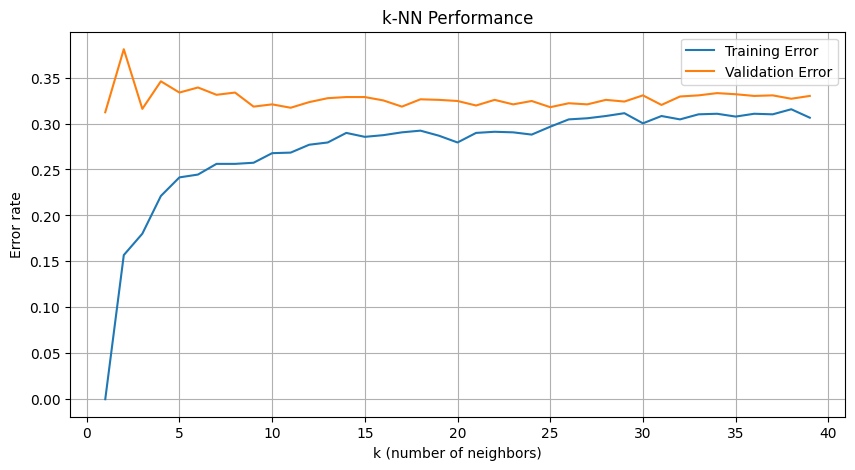

In [ ]:
# Plot
plt.figure(figsize=(10,5))
plt.plot(k_vector, error_train, label="Training Error")
plt.plot(k_vector, error_val, label="Validation Error")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Error rate")
plt.title("k-NN Performance")
plt.legend()
plt.grid(True)
plt.show()